# DoWhy package


# 1. Fundamentals

In [ ]:
!pip install dowhy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install numpy==1.21.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 28.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.21.6 which is incompatible.
dowhy 0.9.1 requires numpy<2.0.0,>=1.23.1, but you have numpy 1.21.6 which is incompatible.


# 2. Import of data

In [ ]:
from dowhy import CausalModel
import dowhy.datasets
#Load some sample data
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000,
    treatment_is_binary=True)
print(data)

{'df':        Z0        Z1        W0        W1        W2        W3        W4     v0  \
0     0.0  0.004970  0.087323 -0.071725  1.888913  0.538472  1.169115   True   
1     1.0  0.873244 -0.526477 -1.317529  3.012952 -0.738136  0.443789   True   
2     0.0  0.239759 -1.557768  0.848085  0.246749 -2.778606 -0.383295  False   
3     0.0  0.742085 -0.201628  2.286015  0.173465 -0.175409  1.728021   True   
4     0.0  0.397023  1.981992 -1.640497  0.030536 -0.689394 -0.446022   True   
...   ...       ...       ...       ...       ...       ...       ...    ...   
9995  0.0  0.111479  0.301702  1.452082  0.081471  0.308772  0.288359   True   
9996  1.0  0.953111  0.062207  0.390743 -1.099291 -0.973631 -1.684664   True   
9997  1.0  0.443034  1.244289  0.239560  2.787003 -0.874108 -0.215378   True   
9998  0.0  0.751117  0.039179 -1.256697  0.507494 -2.763559 -0.133820  False   
9999  1.0  0.642058 -1.392467  0.459454  2.941596 -1.512672  1.048204   True   

              y  
0     25.28963

# 3. Setup of the causal model

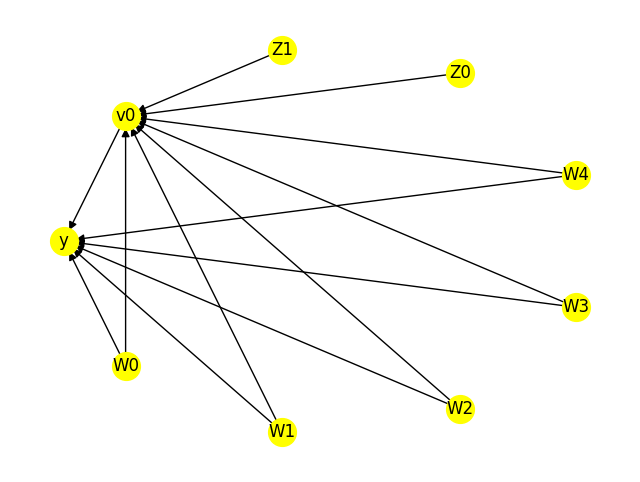

In [ ]:
#Create a causal model from the data and given graph.
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=data["gml_graph"])
model.view_model()

# 4. Identification of estimand

In [ ]:
#Identify the causal effect
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W4,W1,W3,W0,W2])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W4,W1,W3,W0,W2,U) = P(y|v0,W4,W1,W3,W0,W2)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                              -1⎤
 ⎢    d        ⎛    d          ⎞  ⎥
E⎢─────────(y)⋅⎜─────────([v₀])⎟  ⎥
 ⎣d[Z₀  Z₁]    ⎝d[Z₀  Z₁]      ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0,Z1})
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→{v0}, then ¬({Z0,Z1}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



# 5. Deployment of matching method

In [ ]:
estimate=model.estimate_effect(identified_estimand,
method_name="backdoor.propensity_score_matching")
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W4,W1,W3,W0,W2])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W4,W1,W3,W0,W2,U) = P(y|v0,W4,W1,W3,W0,W2)

## Realized estimand
b: y~v0+W4+W1+W3+W0+W2
Target units: ate

## Estimate
Mean value: 9.879121353098371



#6. Textual results

In [ ]:
# Textual Interpreter
interpretation = estimate.interpret(method_name="textual_effect_interpreter")

Increasing the treatment variable(s) [v0] from 0 to 1 causes an increase of 9.879121353098371 in the expected value of the outcome [y], over the data distribution/population represented by the dataset.


In [ ]:
refute_results = model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(refute_results)

Refute: Add a random common cause
Estimated effect:9.879121353098371
New effect:9.879121353098373
p value:2.0

